# Homework 6: Automatic Differentiation

In this homework, you will start using pytorch and automatic differentiation to train models. 

In [1]:
import numpy as np
import torch
from torch.autograd import grad
from sklearn.datasets import make_regression
import torch.nn as nn
import matplotlib.pyplot as plt

We will work on the same problem as last week. 

In [2]:
x = np.linspace(-10,10,100).reshape(-1,1)

In [3]:
y = 0.1 * x**4 + 1.2 * x**3 + 1.2 * x**2 + 2.1 * x 

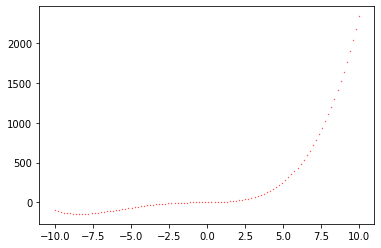

In [4]:
plt.scatter(x,y,color='r',s=0.1)

For your convenience, here is an example showing how to train a linear model by gradient descent.

In [5]:
def model(w,f):
    return lambda x: np.dot(f(x),w)

In [6]:
def f(x):
    return np.concatenate(np.array([x,x**2,x**3,x**4]),axis=1)

In [7]:
def fit(x,y,f,solver):
    w = solver(f(x),y)
    chosen_model = model(w,f)
    plt.scatter(x,y,color='r',s=1.0)
    plt.plot(x,chosen_model(x))

In [8]:
def gradient(X,y,w):
    return -2 * X.T @ y + 2 * X.T @ X @ w

In [9]:
def solve_gd(X,y):
    w = np.array([[2.1],[1],[1],[0]])
    for i in range(1000):
        g = gradient(X,y,w)
        w -= 0.0000000001 * g
     
    return w

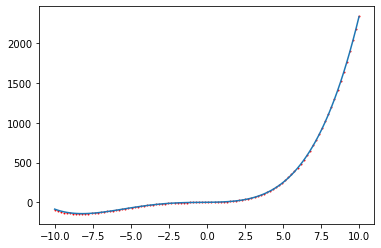

In [10]:
fit(x,y,f,solve_gd)

**Problem 1**: Train the same model, but this time, do it using automatic differentiation. That is, you should **not** use the *gradient* function that was defined above. Instead of calculating the gradient by hand and implementing it, you will compute it automatically. Here are a few hints that will help you:
<ul>
<li> Because it will be used in the *fit* function, your solver will receive numpy arrays as arguments and should return a numpy array. However, your function needs to work using torch tensors. So, the first thing you should do to convert the input to torch tensors, and the last thing you should do is convert the value you want to return back to a numpy array. 
<li> Note that you cannot use the *model* function as we did before, because it works on numpy arrays. You could convert back and forth, but that's too costly. Instead, you should redefine the model so that it uses torch tensors. 
<li> Don't forget that the weights need to be updated for the gradient descent to work, and so you should make sure to define them using the *requires_grad=True* argument.
<li> Even though we have been defining the squared error as a sum of the individual squared errors, you should use the mean.
</ul>

In [11]:
def solve_gd_autodiff(X,y):
    pass

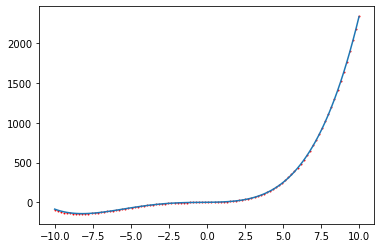

In [12]:
fit(x,y,f,solve_gd_autodiff)